In [1]:
import pandas as pd

symbols = {
    "TOT": "Total",
    "XOM": "Exxon",
    "CVX": "Chevron",
    "COP": "ConocoPhillips",
    "VLO": "Valero Energy",
}
template_name = "financial-data/{}.csv"

quotes = {}
for symbol in symbols:
    data = pd.read_csv(
        template_name.format(symbol), index_col=0, parse_dates=True
    )
    quotes[symbols[symbol]] = data["open"]
quotes = pd.DataFrame(quotes)

In [2]:
quotes

,Total,Exxon,Chevron,ConocoPhillips,Valero Energy
date,,,,,
2003-01-02,71.62,35.00,67.20,48.80,37.04
2003-01-03,72.12,35.25,67.82,49.53,38.13
2003-01-06,72.93,35.45,68.34,49.50,37.37
2003-01-07,72.40,36.05,69.75,49.85,37.46
2003-01-08,69.51,35.15,68.46,48.44,36.51
...,...,...,...,...,...
2007-12-24,80.55,93.51,93.63,87.02,70.42
2007-12-26,81.10,93.66,94.31,87.68,70.92
2007-12-27,82.35,94.94,94.80,88.92,71.10


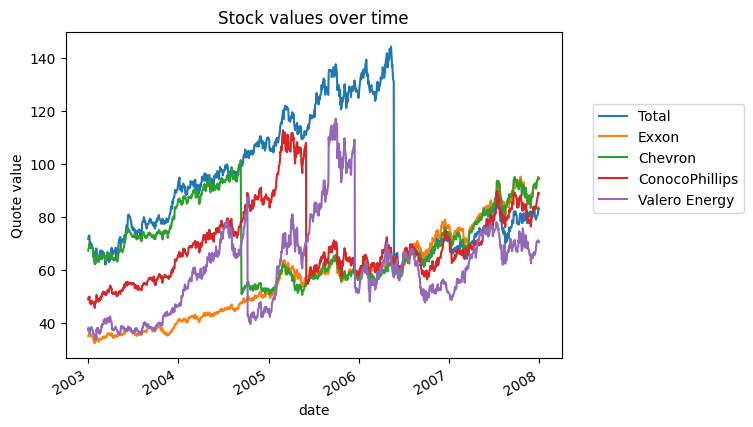

In [3]:
import matplotlib.pyplot as plt

quotes.plot()
plt.ylabel("Quote value")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = plt.title("Stock values over time")

In [4]:
from sklearn.model_selection import train_test_split

data, target = quotes.drop(columns=["Chevron"]), quotes["Chevron"]
data_train, data_test, target_train, target_test = train_test_split(
    data, target, shuffle=True, random_state=42
)

In [5]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()

In [6]:
from sklearn.model_selection import ShuffleSplit
cv=ShuffleSplit(random_state=0)

In [7]:
from sklearn.model_selection import cross_val_score

test_scores = cross_val_score(
    regressor, data_train, target_train, cv=cv, n_jobs=2
)
print(f"R2 score: {test_scores.mean():.2f} +/- {test_scores.std():.2f}")

R2 score: 0.97 +/- 0.05


In [8]:
regressor.fit(data_train, target_train)
target_predicted = regressor.predict(data_test)
target_predicted = pd.Series(target_predicted, target_test.index)

In [9]:
from sklearn.metrics import r2_score

test_score = r2_score(target_test, target_predicted)
print(f"Test R2 score on single split: {test_score:.2f}")

Test R2 score on single split: 0.91


In [10]:
target_test

date
2005-03-28    58.32
2003-05-29    70.85
2003-03-18    64.71
2003-04-03    64.75
2007-04-10    75.79
              ...  
2004-03-02    89.77
2007-01-25    72.50
2003-07-25    71.70
2005-05-18    51.62
2007-02-01    73.25
Name: Chevron, Length: 315, dtype: float64

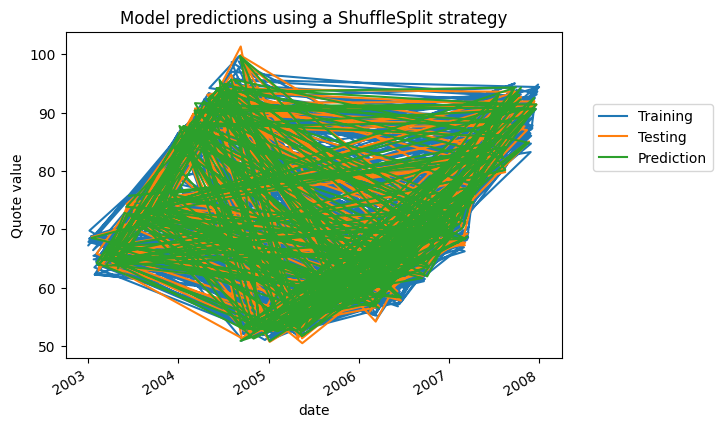

In [12]:
target_train.plot(label="Training", kind="line")
target_test.plot(label="Testing", kind="line")
target_predicted.plot(label="Prediction", kind="line")

plt.ylabel("Quote value")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = plt.title("Model predictions using a ShuffleSplit strategy")

In [14]:
data_train, data_test, target_train, target_test = train_test_split(
    data, target, shuffle=False, random_state=0
)
regressor.fit(data_train, target_train)
target_predicted = regressor.predict(data_test)
target_predicted = pd.Series(target_predicted, index=target_test.index)

In [15]:
test_score = r2_score(target_test, target_predicted)
print(f"Test R2 score on single split: {test_score:.2f}")

Test R2 score on single split: -2.11


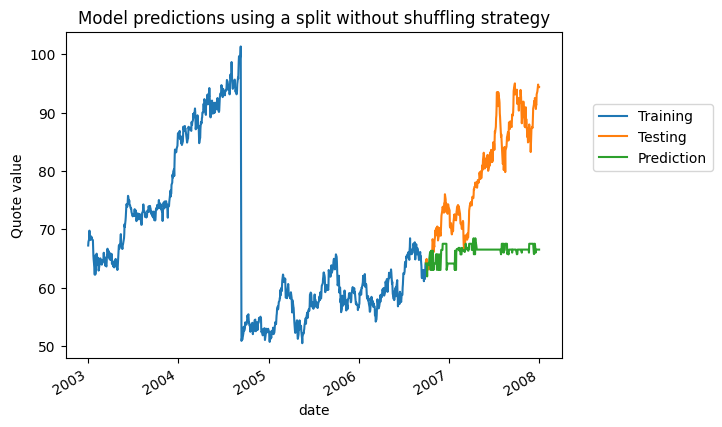

In [17]:
target_train.plot(label="Training")
target_test.plot(label="Testing")
target_predicted.plot(label="Prediction")

plt.ylabel("Quote value")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = plt.title("Model predictions using a split without shuffling strategy")

In [18]:
from sklearn.model_selection import LeaveOneGroupOut

groups = quotes.index.to_period("Q")
cv = LeaveOneGroupOut()
test_scores = cross_val_score(
    regressor, data, target, groups=groups, cv=cv, n_jobs=2
)
print(f"R2 score: {test_scores.mean():.2f} +/- {test_scores.std():.2f}")

R2 score: -1.01 +/- 1.99


In [19]:
from sklearn.model_selection import TimeSeriesSplit

cv=TimeSeriesSplit(n_splits=groups.nunique())
test_score = cross_val_score(
    regressor, data, target, cv=cv, groups=groups, n_jobs=2
)
print(f"The mean R2 is: {test_score.mean():.2f} +/- {test_score.std():.2f}")

The mean R2 is: -2.33 +/- 3.39


c:\env\py310\lib\site-packages\sklearn\model_selection\_split.py:1211: UserWarning: The groups parameter is ignored by TimeSeriesSplit
  warnings.warn(
